In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_dir = '../data/raw/UCF50/'

In [3]:
class_names = os.listdir(data_dir)

In [4]:
import os
import cv2
import numpy as np

def compute_dataset_statistics(data_dir, class_names):
    dic_class_distribution = {}
    median_frames_per_video = {}
    max_frames_per_video = {}
    min_frames_per_video = {}
    mode_frames_per_video = {}
    class_sizes = {}
    total_dataset_size = 0

    for class_name in class_names:
        class_input_path = os.path.join(data_dir, class_name)
        number_of_videos = len(os.listdir(class_input_path))
        dic_class_distribution[class_name] = number_of_videos
        frames_count = []
        class_size = 0
        
        for video_name in os.listdir(class_input_path):
            video_path = os.path.join(class_input_path, video_name)
            cap = cv2.VideoCapture(video_path)
            frame_count = 0
            
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                frame_count += 1
            
            frames_count.append(frame_count)
            cap.release()
            
            # Compute the size of the video file
            video_size = os.path.getsize(video_path)
            class_size += video_size
            total_dataset_size += video_size
        
        median_frames_per_video[class_name] = np.median(frames_count)
        max_frames_per_video[class_name] = np.max(frames_count)
        min_frames_per_video[class_name] = np.min(frames_count)
        mode_frames_per_video[class_name] = np.bincount(frames_count).argmax()
        class_sizes[class_name] = class_size

    return {
        "class_distribution": dic_class_distribution,
        "median_frames_per_video": median_frames_per_video,
        "max_frames_per_video": max_frames_per_video,
        "min_frames_per_video": min_frames_per_video,
        "mode_frames_per_video": mode_frames_per_video,
        "class_sizes": class_sizes,
        "total_dataset_size": total_dataset_size
    }


statistics = compute_dataset_statistics(data_dir, class_names)

In [5]:
print("Class Distribution:", statistics["class_distribution"])
print("Median Frames per Video:", statistics["median_frames_per_video"])
print("Max Frames per Video:", statistics["max_frames_per_video"])
print("Min Frames per Video:", statistics["min_frames_per_video"])
print("Mode Frames per Video:", statistics["mode_frames_per_video"])
print("Class Sizes (in bytes):", statistics["class_sizes"])
print(f"Total Dataset Size: {statistics['total_dataset_size'] / (1024 * 1024 * 1024):.2f} GB")

Class Distribution: {'Mixing': 142, 'TennisSwing': 167, 'HorseRiding': 197, 'JumpRope': 148, 'JumpingJack': 123, 'BaseballPitch': 150, 'Rowing': 137, 'SkateBoarding': 120, 'WalkingWithDog': 123, 'Skijet': 100, 'Nunchucks': 150, 'Billiards': 150, 'PullUps': 120, 'Swing': 137, 'PoleVault': 160, 'GolfSwing': 142, 'Lunges': 141, 'PommelHorse': 123, 'BreastStroke': 101, 'PlayingPiano': 105, 'PlayingTabla': 124, 'Basketball': 137, 'VolleyballSpiking': 116, 'SoccerJuggling': 156, 'CleanAndJerk': 112, 'YoYo': 128, 'PushUps': 106, 'Kayaking': 157, 'HulaHoop': 125, 'JugglingBalls': 122, 'PlayingGuitar': 160, 'Fencing': 111, 'ThrowDiscus': 131, 'MilitaryParade': 127, 'RopeClimbing': 130, 'Biking': 145, 'Punch': 160, 'Drumming': 161, 'BenchPress': 160, 'Diving': 153, 'SalsaSpin': 133, 'PizzaTossing': 114, 'TaiChi': 100, 'HighJump': 123, 'JavelinThrow': 117, 'TrampolineJumping': 119, 'Skiing': 144, 'PlayingViolin': 100, 'HorseRace': 127, 'RockClimbingIndoor': 148}
Median Frames per Video: {'Mixing'

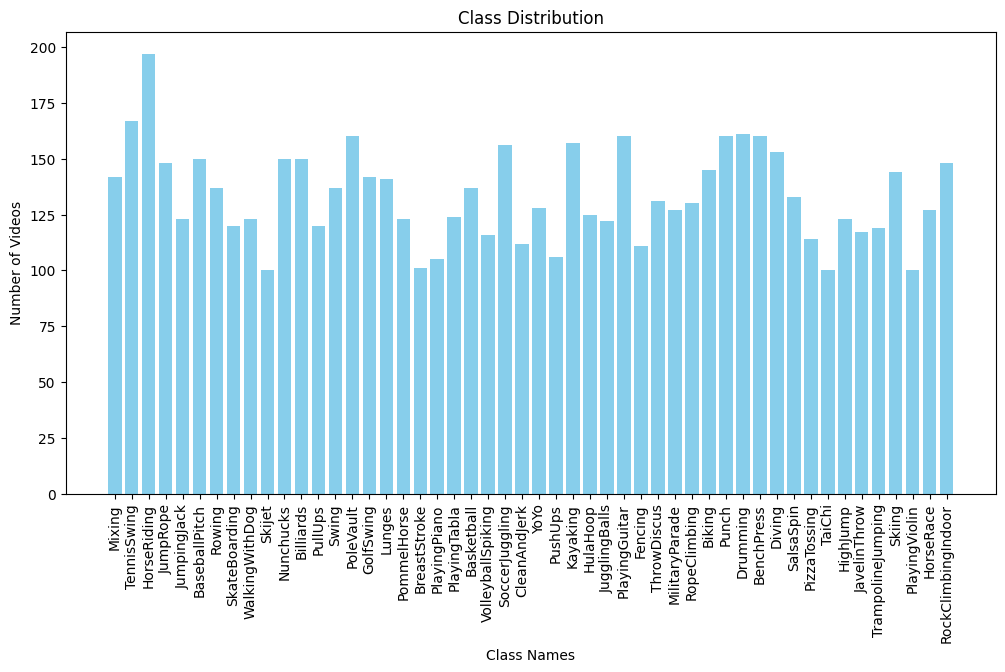

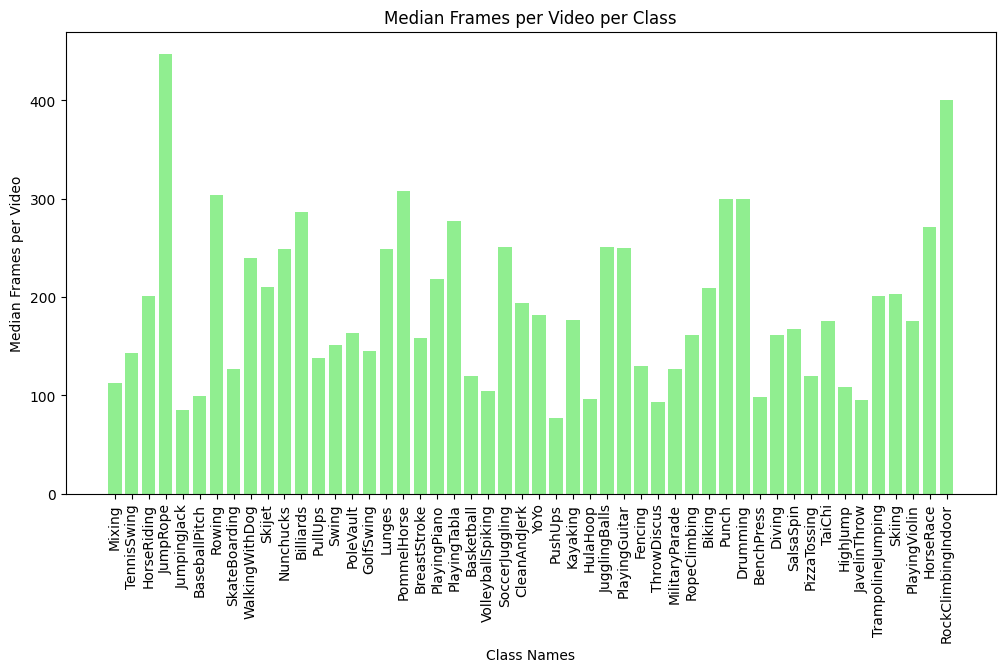

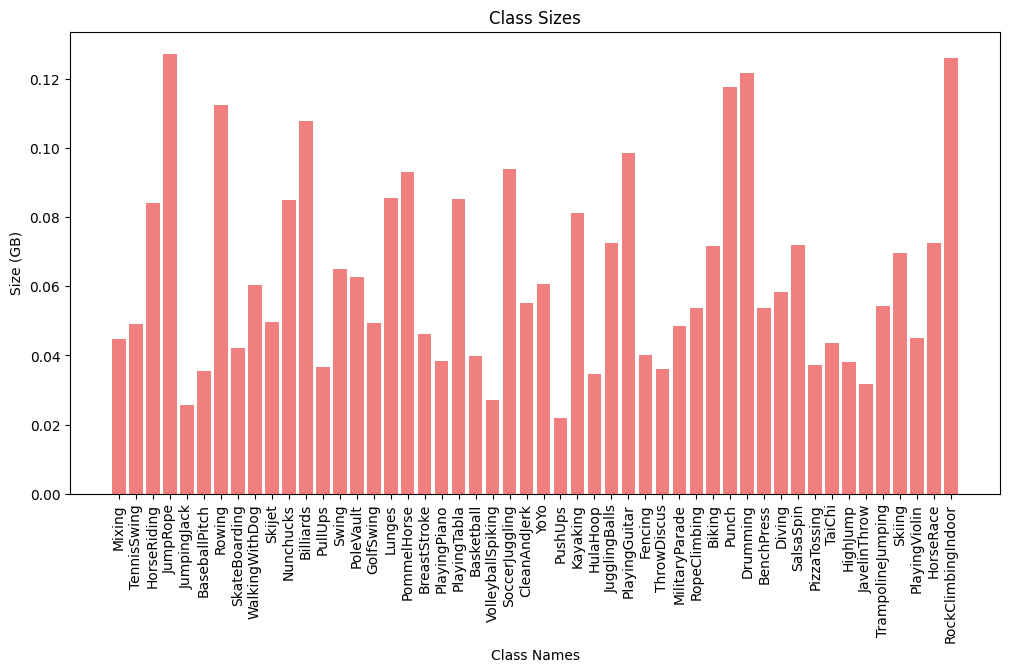

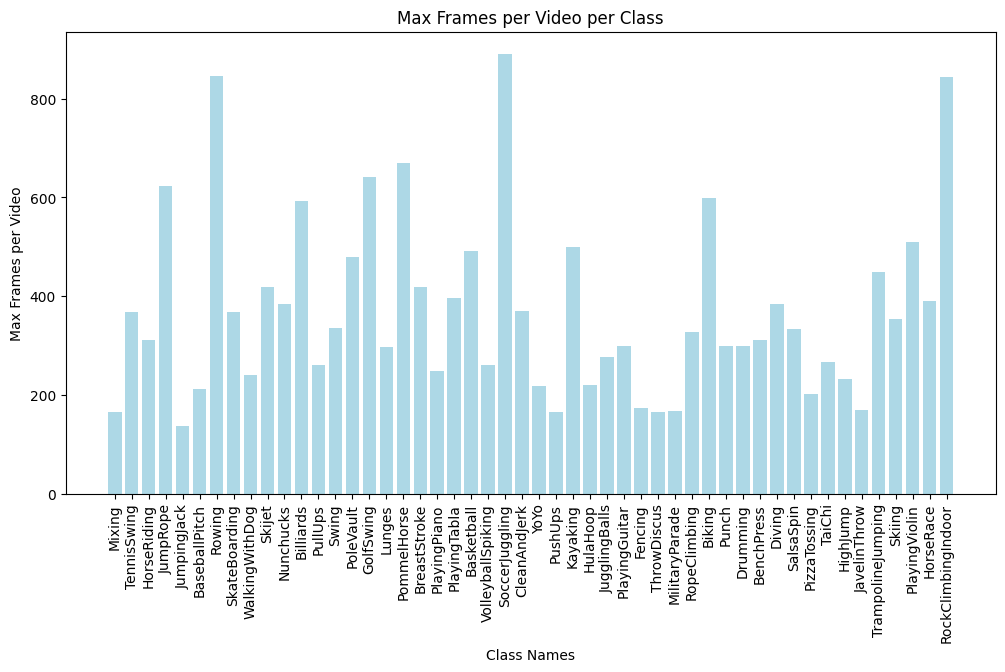

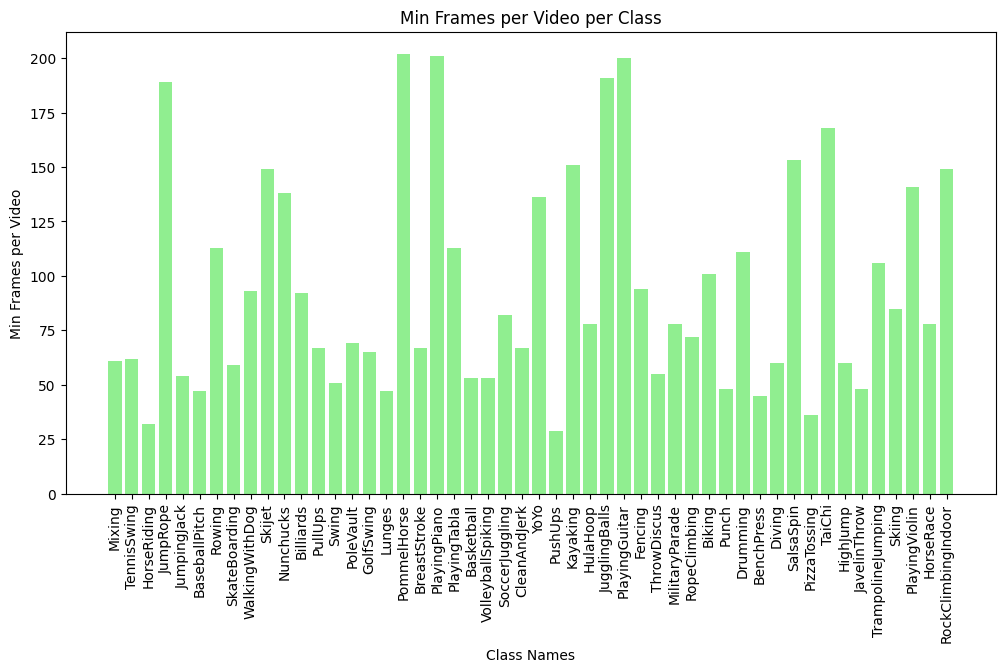

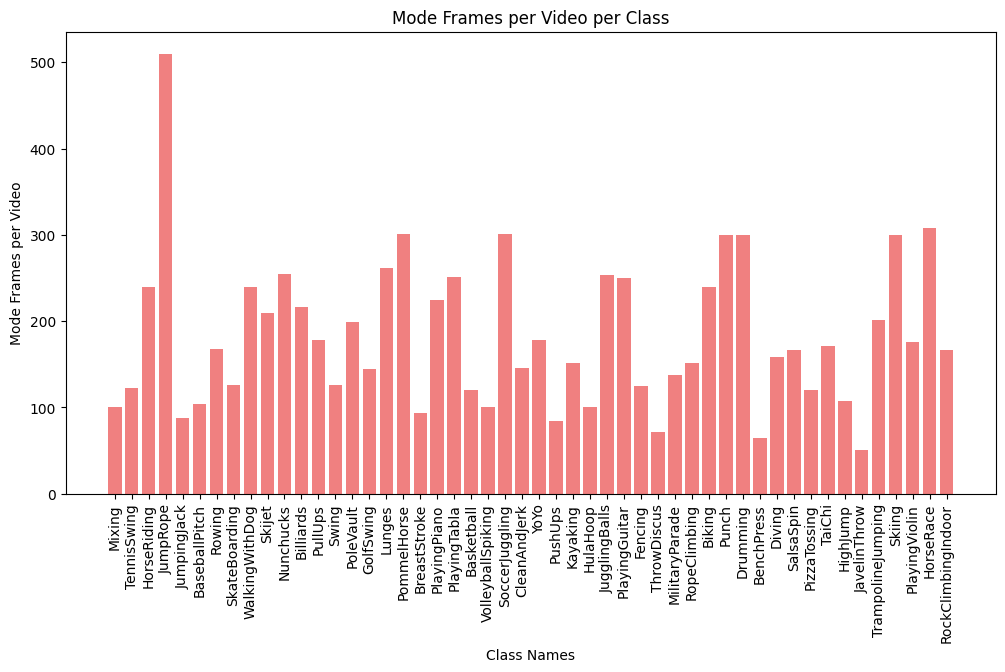

In [8]:
# Ensure the directory exists
output_dir = '../reports/plots'
os.makedirs(output_dir, exist_ok=True)

# Plotting Class Distribution
plt.figure(figsize=(12, 6))
plt.bar(statistics["class_distribution"].keys(), statistics["class_distribution"].values(), color='skyblue')
plt.xlabel('Class Names')
plt.ylabel('Number of Videos')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.savefig(os.path.join(output_dir, 'class_distribution.png'))
plt.show()
plt.close()

# Plotting Median Frames per Video
plt.figure(figsize=(12, 6))
plt.bar(statistics["median_frames_per_video"].keys(), statistics["median_frames_per_video"].values(), color='lightgreen')
plt.xlabel('Class Names')
plt.ylabel('Median Frames per Video')
plt.title('Median Frames per Video per Class')
plt.xticks(rotation=90)
plt.savefig(os.path.join(output_dir, 'median_frames_per_video.png'))
plt.show()
plt.close()

# Plotting Class Sizes
plt.figure(figsize=(12, 6))
plt.bar(statistics["class_sizes"].keys(), [size / (1024 * 1024 * 1024) for size in statistics["class_sizes"].values()], color='lightcoral')
plt.xlabel('Class Names')
plt.ylabel('Size (GB)')
plt.title('Class Sizes')
plt.xticks(rotation=90)
plt.savefig(os.path.join(output_dir, 'class_sizes.png'))
plt.show()
plt.close()

# Plotting Max Frames per Video
plt.figure(figsize=(12, 6))
plt.bar(statistics["max_frames_per_video"].keys(), statistics["max_frames_per_video"].values(), color='lightblue')
plt.xlabel('Class Names')
plt.ylabel('Max Frames per Video')
plt.title('Max Frames per Video per Class')
plt.xticks(rotation=90)
plt.savefig(os.path.join(output_dir, 'max_frames_per_video.png'))
plt.show()
plt.close()

# Plotting Min Frames per Video
plt.figure(figsize=(12, 6))
plt.bar(statistics["min_frames_per_video"].keys(), statistics["min_frames_per_video"].values(), color='lightgreen')
plt.xlabel('Class Names')
plt.ylabel('Min Frames per Video')
plt.title('Min Frames per Video per Class')
plt.xticks(rotation=90)
plt.savefig(os.path.join(output_dir, 'min_frames_per_video.png'))
plt.show()
plt.close()

# Plotting Mode Frames per Video
plt.figure(figsize=(12, 6))
plt.bar(statistics["mode_frames_per_video"].keys(), statistics["mode_frames_per_video"].values(), color='lightcoral')
plt.xlabel('Class Names')
plt.ylabel('Mode Frames per Video')
plt.title('Mode Frames per Video per Class')
plt.xticks(rotation=90)
plt.savefig(os.path.join(output_dir, 'mode_frames_per_video.png'))
plt.show()
plt.close()